<a href="https://colab.research.google.com/github/Duncanswilson/gpt4-code-generation/blob/main/double_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

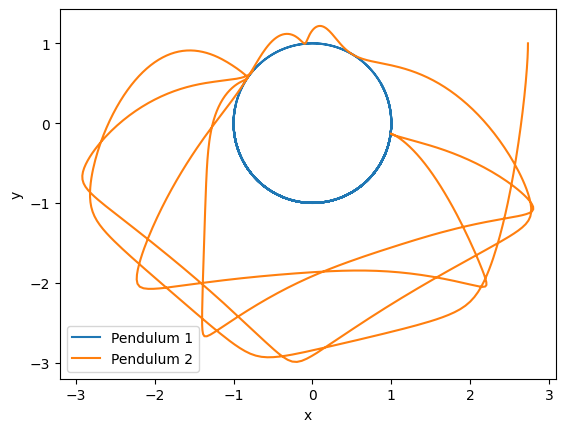

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def double_pendulum(t, y, m1, m2, l1, l2, g):
    theta1, theta2, omega1, omega2 = y
    
    delta_theta = theta2 - theta1
    cos_delta_theta = np.cos(delta_theta)
    sin_delta_theta = np.sin(delta_theta)
    
    a1 = (m2 * l1 * omega1**2 * sin_delta_theta * cos_delta_theta
          + m2 * g * np.sin(theta2) * cos_delta_theta
          + m2 * l2 * omega2**2 * sin_delta_theta
          - (m1 + m2) * g * np.sin(theta1))
    b1 = l1 * ((m1 + m2) - m2 * cos_delta_theta**2)

    a2 = (- m2 * l2 * omega2**2 * sin_delta_theta * cos_delta_theta
          + (m1 + m2) * (g * np.sin(theta1) * cos_delta_theta
                         - l1 * omega1**2 * sin_delta_theta
                         - g * np.sin(theta2)))
    b2 = l2 * ((m1 + m2) - m2 * cos_delta_theta**2)

    dydt = [omega1,
            omega2,
            a1/b1,
            a2/b2]

    return dydt

m1, m2 = 1.0, 3.3  # Masses
l1, l2 = 1.0, 2.0  # Lengths
g = 9.81  # Gravity

# Initial conditions: [theta1, theta2, omega1, omega2]
y0 = [np.pi / 2, np.pi / 1.5, 0, 0]

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODEs
solution = solve_ivp(double_pendulum, t_span, y0, args=(m1, m2, l1, l2, g), t_eval=t_eval)

# Extract solution
theta1, theta2 = solution.y[0], solution.y[1]

# Convert to Cartesian coordinates
x1, y1 = l1 * np.sin(theta1), -l1 * np.cos(theta1)
x2, y2 = x1 + l2 * np.sin(theta2), y1 - l2 * np.cos(theta2)

# Plot the trajectories
plt.plot(x1, y1, label='Pendulum 1')
plt.plot(x2, y2, label='Pendulum 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
!pip install JSAnimation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11423 sha256=d668ea11fcd07a9cd50a99c0d539d742cf3b47d9bed698e95e1a82261359a106
  Stored in directory: /root/.cache/pip/wheels/ca/1c/15/0560d119ac872a47412d9f592720a771741b2ab2d51ec23baf
Successfully built JSAnimation
